# PCM Modeling

In this section of the tutorial, we will use the knowledge from all previous tutorials to construct a simple PCM classification model for four  adenosine receptors (A1, A2A, A2B, A3).

## Data Preparation

First, we need to load the data. For this tutorial we will load the dataset containing data for all four adenosine receptors.

In [1]:
import os

from qsprpred.data import MoleculeTable

os.makedirs("../../tutorial_output/data", exist_ok=True)

dataset = MoleculeTable.fromTableFile(
    name="PCMTutorialDataset",
    filename="../../tutorial_data/AR_LIGANDS.tsv",
    path="../../tutorial_output/data",
)
dataset.randomState = 42

dataset.getDF()

/home/sichom/software/miniconda/envs/qsprpred-312/lib/python3.12/site-packages/Bio/Application/__init__.py:40: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


,SMILES,pchembl_value_Mean,accession,original_smiles,ID,ID_before_change,pchembl_value_Mean_original,Split_IsTrain,Split_Index
ID,,,,,,,,,
PCMTutorialDataset_storage_library_00000,Cc1nn(-c2cc(NC(=O)CCN(C)C)nc(-c3ccc(C)o3)n2)c(...,8.68,P29274,Cc1nn(-c2cc(NC(=O)CCN(C)C)nc(-c3ccc(C)o3)n2)c(...,PCMTutorialDataset_storage_library_00000,PCMTutorialDataset_storage_library_00000,8.68,True,0
PCMTutorialDataset_storage_library_00001,Cc1nn(-c2cc(NC(=O)CCN(C)C)nc(-c3ccc(C)o3)n2)c(...,6.68,P30542,Cc1nn(-c2cc(NC(=O)CCN(C)C)nc(-c3ccc(C)o3)n2)c(...,PCMTutorialDataset_storage_library_00001,PCMTutorialDataset_storage_library_00001,6.68,True,1
PCMTutorialDataset_storage_library_00002,Nc1c(C(=O)Nc2ccc([N+](=O)[O-])cc2)sc2c1cc1CCCC...,4.82,P29274,Nc1c(C(=O)Nc2ccc([N+](=O)[O-])cc2)sc2c1cc1CCCC...,PCMTutorialDataset_storage_library_00002,PCMTutorialDataset_storage_library_00002,4.82,True,2
PCMTutorialDataset_storage_library_00003,O=C(Nc1nc2ncccc2n2c(=O)n(-c3ccccc3)nc12)c1ccccc1,7.15,P0DMS8,O=C(Nc1nc2ncccc2n2c(=O)n(-c3ccccc3)nc12)c1ccccc1,PCMTutorialDataset_storage_library_00003,PCMTutorialDataset_storage_library_00003,7.15,True,3
PCMTutorialDataset_storage_library_00004,O=C(Nc1nc2ncccc2n2c(=O)n(-c3ccccc3)nc12)c1ccccc1,5.65,P29274,O=C(Nc1nc2ncccc2n2c(=O)n(-c3ccccc3)nc12)c1ccccc1,PCMTutorialDataset_storage_library_00004,PCMTutorialDataset_storage_library_00004,5.65,True,4
...,...,...,...,...,...,...,...,...,...
PCMTutorialDataset_storage_library_12452,CCCOc1ccc(C=Cc2cc3c(c(=O)n(C)c(=O)n3C)n2C)cc1,6.51,P29274,CCCOc1ccc(C=Cc2cc3c(c(=O)n(C)c(=O)n3C)n2C)cc1,PCMTutorialDataset_storage_library_12452,PCMTutorialDataset_storage_library_12452,6.51,True,12452
PCMTutorialDataset_storage_library_12453,CCOC(=O)c1cnc(NCC(C)C)n2nc(-c3ccco3)nc12,7.61,P0DMS8,CCOC(=O)c1cnc(NCC(C)C)n2nc(-c3ccco3)nc12,PCMTutorialDataset_storage_library_12453,PCMTutorialDataset_storage_library_12453,7.61,True,12453
PCMTutorialDataset_storage_library_12454,CCOC(=O)c1cnc(NCC(C)C)n2nc(-c3ccco3)nc12,7.35,P29274,CCOC(=O)c1cnc(NCC(C)C)n2nc(-c3ccco3)nc12,PCMTutorialDataset_storage_library_12454,PCMTutorialDataset_storage_library_12454,7.35,True,12454


### Fetching Protein Data

In addition, it is also possible to easily fetch the sequences for our proteins from [Papyrus](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-022-00672-x) data set. You can find more information on how to fetch data from Papyrus within QSPRpred in the [data collection](../../basics/data/data_collection_with_papyrus.ipynb) tutorial. For now, we are using Papyrus ++ in version 05.6.

In [2]:
from qsprpred.data.sources.papyrus import Papyrus

# Papyrus database version 05.6
papyrus = Papyrus(
    data_dir="../../tutorial_data/",
    version="05.6",  # Papyrus database version
    stereo=False,
    plus_only=True,
)

# Get the protein sequences for the four adenosine receptors
acc_keys = ["P29274", "P29275", "P30542", "P0DMS8"]  # A2AR, A2BR, A1R, A3R
dataset_seq = papyrus.getProteinData(
    acc_keys,
    name=f"{dataset.name}_seqs",
    use_existing=True,
    output_dir="../../tutorial_output/data",
)
dataset_seq

,target_id,HGNC_symbol,UniProtID,Status,Organism,Classification,Length,Sequence,TID,accession
0,P29275_WT,ADORA2B,AA2BR_HUMAN,reviewed,Homo sapiens (Human),Membrane receptor->Family A G protein-coupled ...,332,MLLETQDALYVALELVIAALSVAGNVLVCAAVGTANTLQTPTNYFL...,ChEMBL:CHEMBL255;ChEMBL:CHEMBL255;ChEMBL:CHEMB...,P29275
1,P30542_WT,ADORA1,AA1R_HUMAN,reviewed,Homo sapiens (Human),Membrane receptor->Family A G protein-coupled ...,326,MPPSISAFQAAYIGIEVLIALVSVPGNVLVIWAVKVNQALRDATFC...,ChEMBL:CHEMBL226;ChEMBL:CHEMBL226;ChEMBL:CHEMB...,P30542
2,P29274_WT,ADORA2A,AA2AR_HUMAN,reviewed,Homo sapiens (Human),Membrane receptor->Family A G protein-coupled ...,412,MPIMGSSVYITVELAIAVLAILGNVLVCWAVWLNSNLQNVTNYFVV...,ChEMBL:CHEMBL251;ChEMBL:CHEMBL251;ChEMBL:CHEMB...,P29274
3,P0DMS8_WT,ADORA3,AA3R_HUMAN,reviewed,Homo sapiens (Human),Membrane receptor->Family A G protein-coupled ...,318,MPNNSTALSLANVTYITMEIFIGLCAIVGNVLVICVVKLNPSLQTT...,ChEMBL:CHEMBL256;ChEMBL:CHEMBL256;ChEMBL:CHEMB...,P0DMS8


The  keys used to fetch the data are saved in the `accession` colum in the resulting data frame:

In [3]:
dataset.getSubset("accession")

MoleculeTable (12457)

## Calculating Protein Descriptors

In this section, we will show how to connect the information about sequences with our data set and calculate protein descriptors using multiple sequence alignment and the `PCMDataSet` class from the `qsprpred.extra` package. First, let us convert the original data set saved in the `dataset` variable to a `PCMDataSet`:

In [4]:
from qsprpred.extra.data.storage.protein.tabular_pcm import TabularProteinStorage
from qsprpred.extra.data.tables.pcm import PCMDataSet

proteins = TabularProteinStorage(
    name=f"{dataset.name}_proteins",
    store_dir="../../tutorial_output/data",
    df=dataset_seq,
    sequence_col="Sequence",
    protein_col="accession",
)
dataset = PCMDataSet.fromMolTable(
    dataset,
    name=dataset.name,
    proteins=proteins,
    path="../../tutorial_output/data",
    target_props=[{"name": "pchembl_value_Mean", "task": "REGRESSION"}],
)

dataset.save()

qsprpred - WARNING - Existing data set found, but also found a data frame in store. Refusing to overwrite data. If you want to overwrite data in store, set overwrite=True.


`PCMDataset` requires that we provide it with a storage of proteins, which we can easily do by using the `TabularProteinStorage`, which implements this through a pandas data frame and provides proteins and their sequences for the data set. It will also handle mapping between sequences and accession keys.

The `ClustalMSA` object facilitates multiple sequence alignment with the Clustal Omega program (needs to be [installed separately](http://www.clustal.org/omega/)). This is done automatically after `proteinSeqProvider` is invoked before descriptor calculation:

In [5]:
from qsprpred.extra.data.utils.msa_calculator import ClustalMSA
from qsprpred.extra.data.descriptors.sets import ProDec

dataset.addDescriptors([
    ProDec(
        sets=["Zscale Hellberg"],
        msa_provider=ClustalMSA(out_dir=dataset.descsPath)
    )
])

  0%|          | 0/4 [00:00<?, ?it/s]

We can check the descriptor matrix:

In [6]:
dataset.getDescriptors()

,ProDec_Zscale Hellberg_Zscale_1,ProDec_Zscale Hellberg_Zscale_10,ProDec_Zscale Hellberg_Zscale_100,ProDec_Zscale Hellberg_Zscale_1000,ProDec_Zscale Hellberg_Zscale_1001,ProDec_Zscale Hellberg_Zscale_1002,ProDec_Zscale Hellberg_Zscale_1003,ProDec_Zscale Hellberg_Zscale_1004,ProDec_Zscale Hellberg_Zscale_1005,ProDec_Zscale Hellberg_Zscale_1006,...,ProDec_Zscale Hellberg_Zscale_990,ProDec_Zscale Hellberg_Zscale_991,ProDec_Zscale Hellberg_Zscale_992,ProDec_Zscale Hellberg_Zscale_993,ProDec_Zscale Hellberg_Zscale_994,ProDec_Zscale Hellberg_Zscale_995,ProDec_Zscale Hellberg_Zscale_996,ProDec_Zscale Hellberg_Zscale_997,ProDec_Zscale Hellberg_Zscale_998,ProDec_Zscale Hellberg_Zscale_999
ID,,,,,,,,,,,,,,,,,,,,,
PCMTutorialDataset_storage_library_00000,0.00,0.00,0.71,1.96,-1.63,0.57,0.07,-1.73,0.09,2.88,...,0.09,0.07,-1.73,0.09,2.23,-5.36,0.30,0.92,-2.09,-1.40
PCMTutorialDataset_storage_library_00001,0.00,-2.49,-4.44,-1.22,0.88,2.23,3.08,0.39,-0.07,3.08,...,2.36,3.08,0.39,-0.07,3.64,1.13,2.36,-4.19,-1.03,-0.98
PCMTutorialDataset_storage_library_00002,0.00,0.00,0.71,1.96,-1.63,0.57,0.07,-1.73,0.09,2.88,...,0.09,0.07,-1.73,0.09,2.23,-5.36,0.30,0.92,-2.09,-1.40
PCMTutorialDataset_storage_library_00003,-2.49,3.22,-4.44,3.08,0.39,-0.07,2.84,1.41,-3.14,3.22,...,2.36,0.92,-2.09,-1.40,1.96,-1.63,0.57,-4.44,-1.68,-1.03
PCMTutorialDataset_storage_library_00004,0.00,0.00,0.71,1.96,-1.63,0.57,0.07,-1.73,0.09,2.88,...,0.09,0.07,-1.73,0.09,2.23,-5.36,0.30,0.92,-2.09,-1.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PCMTutorialDataset_storage_library_12452,0.00,0.00,0.71,1.96,-1.63,0.57,0.07,-1.73,0.09,2.88,...,0.09,0.07,-1.73,0.09,2.23,-5.36,0.30,0.92,-2.09,-1.40
PCMTutorialDataset_storage_library_12453,-2.49,3.22,-4.44,3.08,0.39,-0.07,2.84,1.41,-3.14,3.22,...,2.36,0.92,-2.09,-1.40,1.96,-1.63,0.57,-4.44,-1.68,-1.03
PCMTutorialDataset_storage_library_12454,0.00,0.00,0.71,1.96,-1.63,0.57,0.07,-1.73,0.09,2.88,...,0.09,0.07,-1.73,0.09,2.23,-5.36,0.30,0.92,-2.09,-1.40


We can of course combine this with molecular descriptors as well:

In [7]:
from qsprpred.data.descriptors.fingerprints import MorganFP

dataset.nJobs = os.cpu_count()  # allowing parallelization to speed things up a little
dataset.addDescriptors([MorganFP(radius=2, nBits=1024)])
dataset.getDescriptors()

,ProDec_Zscale Hellberg_Zscale_1,ProDec_Zscale Hellberg_Zscale_10,ProDec_Zscale Hellberg_Zscale_100,ProDec_Zscale Hellberg_Zscale_1000,ProDec_Zscale Hellberg_Zscale_1001,ProDec_Zscale Hellberg_Zscale_1002,ProDec_Zscale Hellberg_Zscale_1003,ProDec_Zscale Hellberg_Zscale_1004,ProDec_Zscale Hellberg_Zscale_1005,ProDec_Zscale Hellberg_Zscale_1006,...,MorganFP_MorganFP_1014,MorganFP_MorganFP_1015,MorganFP_MorganFP_1016,MorganFP_MorganFP_1017,MorganFP_MorganFP_1018,MorganFP_MorganFP_1019,MorganFP_MorganFP_1020,MorganFP_MorganFP_1021,MorganFP_MorganFP_1022,MorganFP_MorganFP_1023
ID,,,,,,,,,,,,,,,,,,,,,
PCMTutorialDataset_storage_library_00000,0.00,0.00,0.71,1.96,-1.63,0.57,0.07,-1.73,0.09,2.88,...,False,False,False,False,False,False,False,False,False,False
PCMTutorialDataset_storage_library_00001,0.00,-2.49,-4.44,-1.22,0.88,2.23,3.08,0.39,-0.07,3.08,...,False,False,False,False,False,False,False,False,False,False
PCMTutorialDataset_storage_library_00002,0.00,0.00,0.71,1.96,-1.63,0.57,0.07,-1.73,0.09,2.88,...,False,False,False,False,False,False,True,False,False,False
PCMTutorialDataset_storage_library_00003,-2.49,3.22,-4.44,3.08,0.39,-0.07,2.84,1.41,-3.14,3.22,...,False,False,False,False,False,False,False,False,False,False
PCMTutorialDataset_storage_library_00004,0.00,0.00,0.71,1.96,-1.63,0.57,0.07,-1.73,0.09,2.88,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PCMTutorialDataset_storage_library_12452,0.00,0.00,0.71,1.96,-1.63,0.57,0.07,-1.73,0.09,2.88,...,False,False,False,False,False,False,False,False,False,False
PCMTutorialDataset_storage_library_12453,-2.49,3.22,-4.44,3.08,0.39,-0.07,2.84,1.41,-3.14,3.22,...,False,False,False,False,False,False,False,False,False,False
PCMTutorialDataset_storage_library_12454,0.00,0.00,0.71,1.96,-1.63,0.57,0.07,-1.73,0.09,2.88,...,False,False,False,False,False,False,False,False,False,False


To split the dataset we use the `PCMsplit`, which is a wrapper around the `DataSplit` class. It splits a dataset into train and test set such that the subsets are balanced with respect to each of the protein targets. This is done with https://github.com/sohviluukkonen/gbmt-splits, linear programming of initial clusters (random-, scaffold- or cluster-based) to get a balanced split.
It therefore expects either a `RandomSplit`, `ScaffoldSplit` or `ClusterSplit` object as input.

In [8]:
from qsprpred.extra.data.sampling.splits import PCMSplit
from qsprpred.data import RandomSplit

dataset.split(PCMSplit(splitter=RandomSplit(test_fraction=0.2),
                       dataset=dataset))  # 20% test set per target

## Model Construction

Now that we have defined our preprocessing steps, we can construct our model. We will use a simple K-nearest neighbors model in this case, but notice that the training code is almost the same as in the simple [quick start](../../quick_start.ipynb). The only difference is that we are using the `SklearnPCMModel` class instead of `SklearnModel`:

In [9]:
from sklearn.neighbors import KNeighborsRegressor
from qsprpred.extra.models.pcm import SklearnPCMModel
from qsprpred.models import CrossValAssessor, TestSetAssessor

os.makedirs('../../tutorial_output/data', exist_ok=True)

model = SklearnPCMModel(
    base_dir='../../tutorial_output/models',
    alg=KNeighborsRegressor,
    name='PCMTutorialModel',
)

CrossValAssessor(scoring='r2')(model, dataset)
TestSetAssessor(scoring='r2')(model, dataset)
_ = model.fitDataset(dataset)

In [10]:
from qsprpred.extra.models.pcm import SklearnPCMModel

model = SklearnPCMModel.fromFile(
    "../../tutorial_output/models/PCMTutorialModel/PCMTutorialModel_meta.json")

The `SklearnPCMModel` class is a subclass of `SklearnModel` and thus inherits all of its functionality. The only difference is in how it handles predictions, which we will [show later](#model-prediction). Model evaluation and plotting is also the same as in the [quick start](../../quick_start.ipynb) tutorial:

PCMTutorialModel


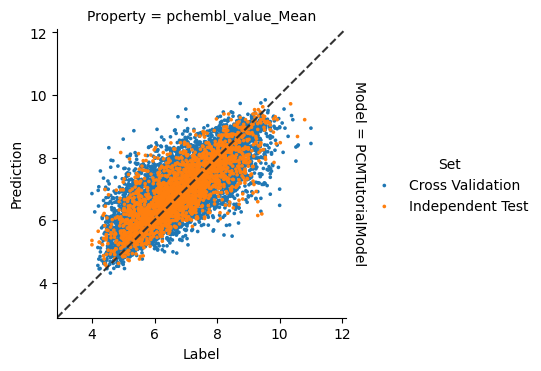

(<seaborn.axisgrid.FacetGrid at 0x7f30944ed910>,
               Model              Fold            Property        R2      RMSE  \
 0  PCMTutorialModel               0.0  pchembl_value_Mean  0.612554  0.707523   
 1  PCMTutorialModel               1.0  pchembl_value_Mean  0.617960  0.687269   
 2  PCMTutorialModel               2.0  pchembl_value_Mean  0.624407  0.688848   
 3  PCMTutorialModel               3.0  pchembl_value_Mean  0.625492  0.685553   
 4  PCMTutorialModel               4.0  pchembl_value_Mean  0.604101  0.709581   
 5  PCMTutorialModel  Independent Test  pchembl_value_Mean  0.631381  0.684782   
 
                 Set  
 0  Cross Validation  
 1  Cross Validation  
 2  Cross Validation  
 3  Cross Validation  
 4  Cross Validation  
 5  Independent Test  )

<Figure size 640x480 with 0 Axes>

In [11]:
from qsprpred.plotting.regression import CorrelationPlot

plot = CorrelationPlot([model])
plot.make(save=False, show=True)

## Model Prediction

Prediction with the PCM model works similarly to regular models. We can load the saved model using its name (`PCMTutorialModel`) as usual:

In [12]:
model_from_files = SklearnPCMModel(name='PCMTutorialModel',
                                   base_dir='../../tutorial_output/models')
model_from_files

But naturally when doing the prediction, we need to provide the protein ID to fetch protein descriptors for as well. When we created the model all necessary information to use the generated MSA and calculate protein descriptors was saved:

In [13]:
sample_mols = [
    'CN1C=NC2=C1C(=O)N(C(=O)N2C)C',  # caffeine
    'c1ccccc1CCN1N=CC2=C1N=C(N)N3C2=NC(C4=CC=CO4)=N3'
    # SCH-58261 (50x more selective to A2A than caffeine -> more potent)
]

In [14]:
set(dataset.getProperty(dataset.proteinIDProp))

{'P0DMS8', 'P29274', 'P29275', 'P30542'}

In [15]:
model_from_files.predictMols(
    sample_mols,
    protein_id='P29274',  # human adenosine A2A receptor
)

qsprpred - WARNING - Not all protein IDs found in storage 'TabularStorageBasic (2)' properties: ID
SklearnPCMModel_8740389975984_store_library_0    P29274
SklearnPCMModel_8740389975984_store_library_1    P29274
Name: accession, dtype: object. Missing the following protein IDs: {'P29275', 'P0DMS8', 'P30542'}


  0%|          | 0/4 [00:00<?, ?it/s]

array([[6.35933333],
       [8.49261538]])

Now that makes sense. We can see that for the selective compound (`SCH-58261`), the model predicts it as very active. If we use the same compounds with the other isoforms, we can see that although the model predicts it as active for all isoforms, it is not as active for the A2A isoform:

In [16]:
model_from_files.predictMols(
    sample_mols,
    protein_id='P30542',  # human adenosine A1 receptor
)

qsprpred - WARNING - Not all protein IDs found in storage 'TabularStorageBasic (2)' properties: ID
SklearnPCMModel_8740389975984_store_library_0    P30542
SklearnPCMModel_8740389975984_store_library_1    P30542
Name: accession, dtype: object. Missing the following protein IDs: {'P29275', 'P0DMS8', 'P29274'}


  0%|          | 0/4 [00:00<?, ?it/s]

array([[5.328],
       [6.969]])

In [17]:
model_from_files.predictMols(
    sample_mols,
    protein_id='P0DMS8',  # human adenosine A3 receptor
)

qsprpred - WARNING - Not all protein IDs found in storage 'TabularStorageBasic (2)' properties: ID
SklearnPCMModel_8740389975984_store_library_0    P0DMS8
SklearnPCMModel_8740389975984_store_library_1    P0DMS8
Name: accession, dtype: object. Missing the following protein IDs: {'P29275', 'P30542', 'P29274'}


  0%|          | 0/4 [00:00<?, ?it/s]

array([[6.03  ],
       [6.1895]])

In [18]:
model_from_files.predictMols(
    sample_mols,
    protein_id='P29275',  # human adenosine A2B receptor
)

qsprpred - WARNING - Not all protein IDs found in storage 'TabularStorageBasic (2)' properties: ID
SklearnPCMModel_8740389975984_store_library_0    P29275
SklearnPCMModel_8740389975984_store_library_1    P29275
Name: accession, dtype: object. Missing the following protein IDs: {'P29274', 'P0DMS8', 'P30542'}


  0%|          | 0/4 [00:00<?, ?it/s]

array([[5.266],
       [7.209]])